# Achieve high accuracy on image classification wih CIFAR-10
in this nootebook we gonne apply some techniques to increase the accuracy 

we will accomplish the project by following steps:
1. Import the dependencies.
2. Get the data ready for training:
    - Download the data from the Keras library.
    - Split it into train, validate, and test datasets.
    - Normalize the data.
    - One-hot encode the labels.
3. Build the model architecture. In addition to regular convolutional and pooling
layers, we add the following layers to our architecture:
    - Deeper neural network to increase learning capacity
    - Dropout layers
    - L2 regularization to our convolutional layers
    - Batch normalization layers
4. Train the model.
5. Evaluate the model.
6. Plot the learning curve

## 1. Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

print("TF: ",tf.__version__)
print("numpy: ",np.__version__)


TF:  2.16.1
numpy:  1.26.4


## 2. Get The Data Ready

In [2]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

(x_train , x_valid)= x_train[5000:], x_train[:5000]
(y_train, y_valid)= y_train[5000:], y_train[:5000]

print(f'x_train : {x_train.shape}')
print(f'x_valid : {x_valid.shape}')
print(f'x_test : {x_test.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train : (45000, 32, 32, 3)
x_valid : (5000, 32, 32, 3)
x_test : (10000, 32, 32, 3)


**Normalize the Data**

Normalizing the pixel values of our images is done by subtracting the mean from each
pixel and then dividing the result by the standard deviation

In [3]:
mean= np.mean(x_train,axis=(0,1,2,3))
std= np.std(x_train,axis=(0,1,2,3))

x_train=(x_train - mean) / (std+1e-7)
x_valid=(x_valid - mean) / (std+1e-7)
x_test=(x_test - mean) / (std+1e-7)


One Hot Encoding

In [4]:
num_classes= 10
y_train= to_categorical(y_train,num_classes)
y_valid= to_categorical(y_valid,num_classes)
y_test= to_categorical(y_test,num_classes)


Data Augmentation

In [5]:
datagn=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    
)
datagn.fit(x_train)


## 3. Build the model Architure

This Architucture inspired by VGGNet

In [6]:
base_hidden_units=32
weight_decay=1e-4

model= tf.keras.Sequential()

# CONV-1
model.add(Conv2D(base_hidden_units,kernel_size=3,padding='same',
                          kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                          input_shape=x_train.shape[1:] ,activation='relu'))
model.add(BatchNormalization())

# CONV-2
model.add(Conv2D(base_hidden_units,kernel_size=3,padding='same',
                          kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                            activation='relu'))
#model.add(Activation='relu')
model.add(BatchNormalization())

# pool + droupout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# CONV-3
model.add(Conv2D(base_hidden_units *2 , kernel_size=3,padding='same',
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                 activation='relu'
                ))
#model.add(Activation='relu')
model.add(BatchNormalization())

# Conv-4
model.add(Conv2D(base_hidden_units *2 , kernel_size=3,padding='same',
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                 activation='relu'
                ))
#model.add(Activation='relu')
model.add(BatchNormalization())

# POOL + Droupuot
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Conv-5
model.add(Conv2D(base_hidden_units*4, kernel_size=3,padding='same',
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                activation='relu'))
#model.add(Activation='relu')
model.add(BatchNormalization())

# Conv-6
model.add(Conv2D(base_hidden_units*4, kernel_size=3,padding='same',
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                activation='relu'))
#model.add(Activation='relu')
model.add(BatchNormalization())

# POOl + Dropout

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# FC7
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

## 4. Train the model

In [10]:
batch_size=128
epochs=125

checkpointer= ModelCheckpoint(filepath='model.125epochs.keras',verbose=1,save_best_only=True)
optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001,decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

history= model.fit(datagn.flow(x_train,y_train, batch_size=batch_size),
                   callbacks=[checkpointer],
                   epochs=epochs,
                  steps_per_epoch=x_train.shape[0],verbose=2,validation_data=(x_valid,y_valid))

Epoch 1/125


/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734947190.704745      95 service.cc:145] XLA service 0x7cabb800b2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734947190.704801      95 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734947190.704808      95 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1734947198.922373      95 device_compiler


Epoch 1: val_loss improved from inf to 2.02021, saving model to model.125epochs.keras
45000/45000 - 44s - 973us/step - accuracy: 0.2670 - loss: 2.9056 - val_accuracy: 0.3106 - val_loss: 2.0202
Epoch 2/125

Epoch 2: val_loss improved from 2.02021 to 1.55866, saving model to model.125epochs.keras
45000/45000 - 24s - 536us/step - accuracy: 0.3473 - loss: 2.1839 - val_accuracy: 0.4792 - val_loss: 1.5587
Epoch 3/125

Epoch 3: val_loss improved from 1.55866 to 1.46715, saving model to model.125epochs.keras
45000/45000 - 24s - 540us/step - accuracy: 0.3975 - loss: 1.9084 - val_accuracy: 0.5032 - val_loss: 1.4672
Epoch 4/125

Epoch 4: val_loss improved from 1.46715 to 1.41597, saving model to model.125epochs.keras
45000/45000 - 24s - 528us/step - accuracy: 0.4334 - loss: 1.7527 - val_accuracy: 0.5172 - val_loss: 1.4160
Epoch 5/125

Epoch 5: val_loss did not improve from 1.41597
45000/45000 - 24s - 532us/step - accuracy: 0.4616 - loss: 1.6425 - val_accuracy: 0.5126 - val_loss: 1.4463
Epoch 6/1

## 5. Evaluate The Model


In [25]:
scores= model.evaluate(x_test,y_test,batch_size=128, verbose=1)

print(f'Test result :{scores[1]*100 } \nLoss: {scores[0]}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8502 - loss: 0.4925
Test result :85.14000177383423 
Loss: 0.4936971068382263


Plot Learning Curve

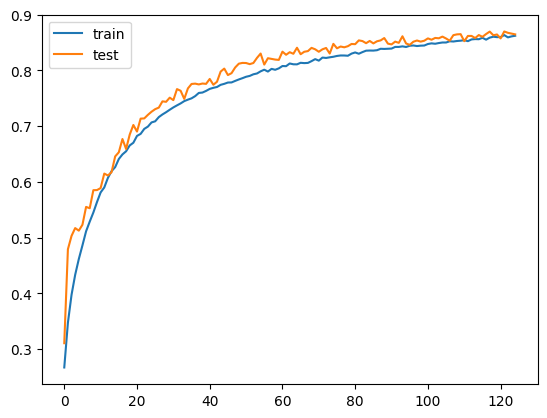

In [14]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()